In [2]:
import os
import sys
import json
import nltk
import pandas as pd

In [3]:
def read_json_from_folder(folder_name):
    """
    Reads all json files from a folder and returns a list of dictionaries
    """
    json_list = []
    for file in os.listdir(folder_name):
        if file.endswith(".json"):
            with open(folder_name + "/" + file) as json_file:
                json_list.append(json.load(json_file))
    return json_list
    


In [4]:
# read json from each folder in parent directory and append to a list
json_list = []
for folder in os.listdir(os.getcwd()):
    if os.path.isdir(folder):
        for file in os.listdir(os.getcwd() + "/" + folder):
            if file.endswith(".json"):
                with open(os.getcwd() + "/" + folder + "/" + file) as json_file:
                    json_list.append(json.load(json_file))


In [5]:
def message(i,j): return json_list[i]['messages'][j]

In [6]:
def check_content(message_dict):
    """
    Checks if the message is a text message
    if content exists return content else return 0
    """
    if 'content' in message_dict.keys() and message_dict['content'] != None and message_dict['sender_name'] == "red5":
        return message_dict['content']
    else:
        return 0

In [7]:
message_list = []
for i in range(len(json_list)):
    for j in range(len(json_list[i]['messages'])):
        if check_content(message(i,j)) != 0:
        
            message_list.append(message(i,j)['content'])

In [8]:
# for every item in meaage list, split into words and append to a list
word_list = []
for i in range(len(message_list)):
    word_list.append(message_list[i].split())
    

In [9]:
# flatten word_list
word_list = [item for sublist in word_list for item in sublist]


In [10]:

from nltk.corpus import stopwords
nltk.download('stopwords')
updated_word_list = []
for i in range(len(word_list)):
    updated_word_list.append(word_list[i].lower().strip('.,!?;:()[]{}'))

# remove stopwords
stop_words = set(stopwords.words('english'))
updated_word_list = [w for w in updated_word_list if not w in stop_words]

from collections import Counter
word_count = Counter(updated_word_list)

[nltk_data] Downloading package stopwords to /home/s/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


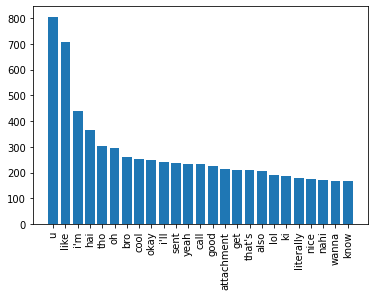

In [11]:
# histogram of most common words vs frequency
import matplotlib.pyplot as plt
import numpy as np
plot = plt.bar(range(25), [x[1] for x in word_count.most_common()[:25]], align='center')
plt.xticks(range(25), [x[0] for x in word_count.most_common()[:25]], rotation='vertical')
plt.show()




In [12]:
# count nnumber of nouns, verbs, adjectives, adverbs
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nouns = []
verbs = []
adjectives = []
adverbs = []

s = ' '.join(updated_word_list)
tokens = word_tokenize(s)
tags = pos_tag(tokens)



[nltk_data] Downloading package punkt to /home/s/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/s/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:

for i in range(len(tags)):
    # counts all the nouns
    if tags[i][1] == 'NN' or tags[i][1] == 'NNP' or tags[i][1] == 'NNS':
        nouns.append(tags[i][0])
    # count all verbs
    if tags[i][1] == 'VB' or tags[i][1] == 'VBD' or tags[i][1] == 'VBG' or tags[i][1] == 'VBN' or tags[i][1] == 'VBP' or tags[i][1] == 'VBZ':
        verbs.append(tags[i][0])
    # count all adjectives
    if tags[i][1] == 'JJ' or tags[i][1] == 'JJR' or tags[i][1] == 'JJS':
        adjectives.append(tags[i][0])
    # count all adverbs
    if tags[i][1] == 'RB' or tags[i][1] == 'RBR' or tags[i][1] == 'RBS':
        adverbs.append(tags[i][0])
        

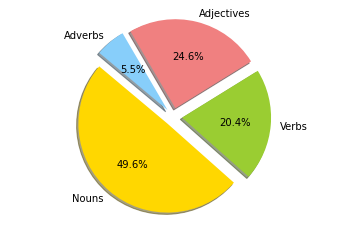

In [14]:
len(set(nouns)), len(set(verbs)), len(set(adjectives)), len(set(adverbs))
# plot a pie chart of these counts

labels = 'Nouns', 'Verbs', 'Adjectives', 'Adverbs'
sizes = [len(set(nouns)), len(set(verbs)), len(set(adjectives)), len(set(adverbs))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice
plot = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


In [15]:
# perform nltk sentiment analysis on the message
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


In [16]:
sentences = []
for i in range(len(message_list)):
    sentences.append(message_list[i])

In [17]:
# apply sentiment analysis to each sentence
sentiment_list = []
for i in range(len(sentences)):
    sentiment_list.append(sid.polarity_scores(sentences[i]))
    

In [18]:
# sum all types of sentiment scores
sum_pos = 0
sum_neg = 0
sum_neu = 0
for i in range(len(sentiment_list)):
    sum_pos += sentiment_list[i]['pos']
    sum_neg += sentiment_list[i]['neg']
    sum_neu += sentiment_list[i]['neu']
    

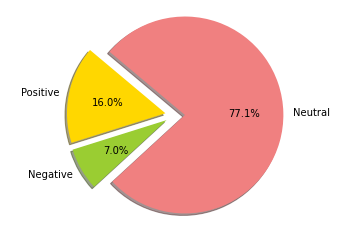

In [19]:
# plot a pie chart of the sum of all types of sentiment scores
labels = 'Positive', 'Negative', 'Neutral'
sizes = [sum_pos, sum_neg, sum_neu]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1)  # explode 1st slice
plot = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


In [32]:
# get the relative imortance of each word for a given sentence
def get_word_importance(sentence):
    """
    Returns a list of tuples of the form (word, relative_importance)
    """
    word_list = word_tokenize(sentence)
    word_list = [w.lower().strip('.,!?;:()[]{}') for w in word_list]
    word_list = [w for w in word_list if not w in stop_words]
    word_list = [w for w in word_list if w.isalpha()]
    word_list = [w for w in word_list if w in word_count.keys()]
    
    word_importance = []
    for i in range(len(word_list)):
        word_importance.append((word_list[i], word_count[word_list[i]]/len(word_list)))
    return word_importance

In [75]:
# get word importance on each sentence, and sum up the word importance
importance_list = []
for i in range(len(sentences)):
    importance_list.append(get_word_importance(sentences[i]))
    

In [76]:
importance_list_flat = [item for sublist in importance_list for item in sublist]

In [112]:
# create a dict with the word as key and the relative importance as value. add the word to the dict if it is not already there, if it is there, add the relative importance to the existing value and divide by the number of words
word_importance_dict = {}
for i in range(len(importance_list_flat)):
    if importance_list_flat[i][0] not in word_importance_dict.keys():
        word_importance_dict[importance_list_flat[i][0]] = importance_list_flat[i][1]
    else:
        word_importance_dict[importance_list_flat[i][0]] += importance_list_flat[i][1]


# divide by the number occurence in the word_count dict
for key in word_importance_dict.keys():
    word_importance_dict[key] = word_importance_dict[key]/word_count[key]


In [113]:
# sort the dict by value
sorted_word_importance_dict = sorted(word_importance_dict.items(), key=lambda x: x[1], reverse=True)